<a href="https://colab.research.google.com/github/jessie0628/codingwithcx/blob/master/Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Debugging your code

It is very rare for a code to work perfectly for the first time. There usually many erros which maybe syntactical mistakes or flaws in the logic of the code itself. That is why it is absolutely essential to be able to debug your code. Debugging has two steps:
- Understand the error message.
- Find the source of the error.
- Find a solution.

## Common mistakes

Case sensitive

In [0]:
Name = "Max"
Age = "20"

print("My name is {} and I am {} years old".format(name,age))

Reserved keywords

In [0]:
name = "Max"
class = 5

print("My name is {} and study in class {}.".format(name,class))

Iterating over lists

In [0]:
spam = ['cat', 'dog', 'mouse']

for i in range(spam):

    print(spam[i])


Trying to concatenate a non-string value to a string value.

In [0]:
numEggs = 12

print('I have ' + numEggs + ' eggs.')

Indexing errors

In [0]:
spam = ['cat', 'dog', 'mouse']

print(spam[3])

 

Find factors of 10

In [0]:
for i in range(10):
    if 10%i == 0:
        print("{}".format(i))

I have defined some four functions here. These four functions are being called by a parent function.
Try to run these cells and solve the errors you get.

In [0]:
# a function to count the sum of first N natural numbers

def count(n)
    count = n(n+1)/2
return count



In [0]:
# a function to count the sum of even natural numbers till N

def count_even(n)
    for i in range(n):
    if i%2 = 0
        count += n
    return count

In [0]:
# a function to count the sum of odd natural numbers till N

def count_odd(n)
    for i in (0,n)
        if i%2 != 0
        count += i
        return count

In [0]:
# a function to count the sum of squares of first N natural numbers

def count_square(n):
return n/6*(n+1)*(2n+1)

In [0]:
def calculate_all(n):
    count = count(n)
    count_even = count_even(n)
    count_odd = count_odd(n)
    count_squares = count_square(n)
    
    print("Sum of first {} natural numbers: {}".format(n,count))
    print("Sum of all even natural numbers till {} is: {}".format(n,count_even))
    print("Sum of all odd natural numbers till {} is: {}".format(n,count_odd))
    print("Sum of squares of first {} natural numbers: {}".format(n,count_squares))

In [0]:
calculate_all(2)

Some libraries needed for the next steps

In [4]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import scipy.ndimage
from scipy import misc
from glob import glob
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
import skimage
import imageio
import seaborn as sns
from PIL import Image
import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# Loading Image Data

First we need access to data. 
- You can use this link to add the data to your drive: https://drive.google.com/drive/folders/1pHNxZVrlcKh5usWoNC_V7gR2WdeDutjv

- Then go inside the folder **CS_for_MedStudents_data** and you will see the folder **HAM10000**.
- Right click on the **HAM10000** folder and click on the **Add to my Drive** option.

Now you can run the next cell

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_dir = "/content/drive/My Drive/HAM10000"

## About the data

The HAM10000 ("Human Against Machine with 10000 training images") dataset which contains 10,015 dermatoscopic images was made publically available by the Harvard database on June 2018 in the hopes to provide training data for automating the process of skin cancer lesion classifications. The motivation behind this act was to provide the public with an abundance and variability of data source for machine learning training purposes such that the results may be compared with that of human experts. If successful, the appplications would bring cost and time saving regimes to hospitals and medical professions alike.

Apart from the 10,015 images, a metadata file with demographic information of each lesion is provided as well. More than 50% of lesions are confirmed through histopathology (histo), the ground truth for the rest of the cases is either follow-up examination (follow_up), expert consensus (consensus), or confirmation by in-vivo confocal microscopy (confocal)

You can download the dataset here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T

The 7 classes of skin cancer lesions included in this dataset are:

- Melanocytic nevi
- Melanoma
- Benign keratosis-like lesions
- Basal cell carcinoma
- Actinic keratoses
- Vascular lesions
- Dermatofibroma

Let's analyze the metadata of the dataset

In [5]:
# importing metadata and checking for its shape
metadata = pd.read_csv(data_dir + '/HAM10000_metadata.csv')
print(metadata.shape)

# label encoding the seven classes for skin cancers

le = LabelEncoder()
le.fit(metadata['dx'])
print("Classes:", list(le.classes_))
 
metadata['label'] = le.transform(metadata["dx"]) 
metadata.sample(10)

(10015, 7)
Classes: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


lesion_id      image_id     dx  ...     sex     localization label
9781  HAM_0000859  ISIC_0029715  akiec  ...    male  lower extremity     0
5848  HAM_0007134  ISIC_0026394     nv  ...    male          abdomen     5
6630  HAM_0007406  ISIC_0028253     nv  ...  female            trunk     5
7545  HAM_0003181  ISIC_0033976     nv  ...    male             back     5
3876  HAM_0000027  ISIC_0030509     nv  ...  female            trunk     5
1636  HAM_0007117  ISIC_0033687    mel  ...    male             back     4
5332  HAM_0003169  ISIC_0028867     nv  ...  female             hand     5
5711  HAM_0001066  ISIC_0028949     nv  ...    male  lower extremity     5
2063  HAM_0000910  ISIC_0028017    mel  ...  female             back     4
883   HAM_0007090  ISIC_0029555    bkl  ...  female  upper extremity     2

[10 rows x 8 columns]

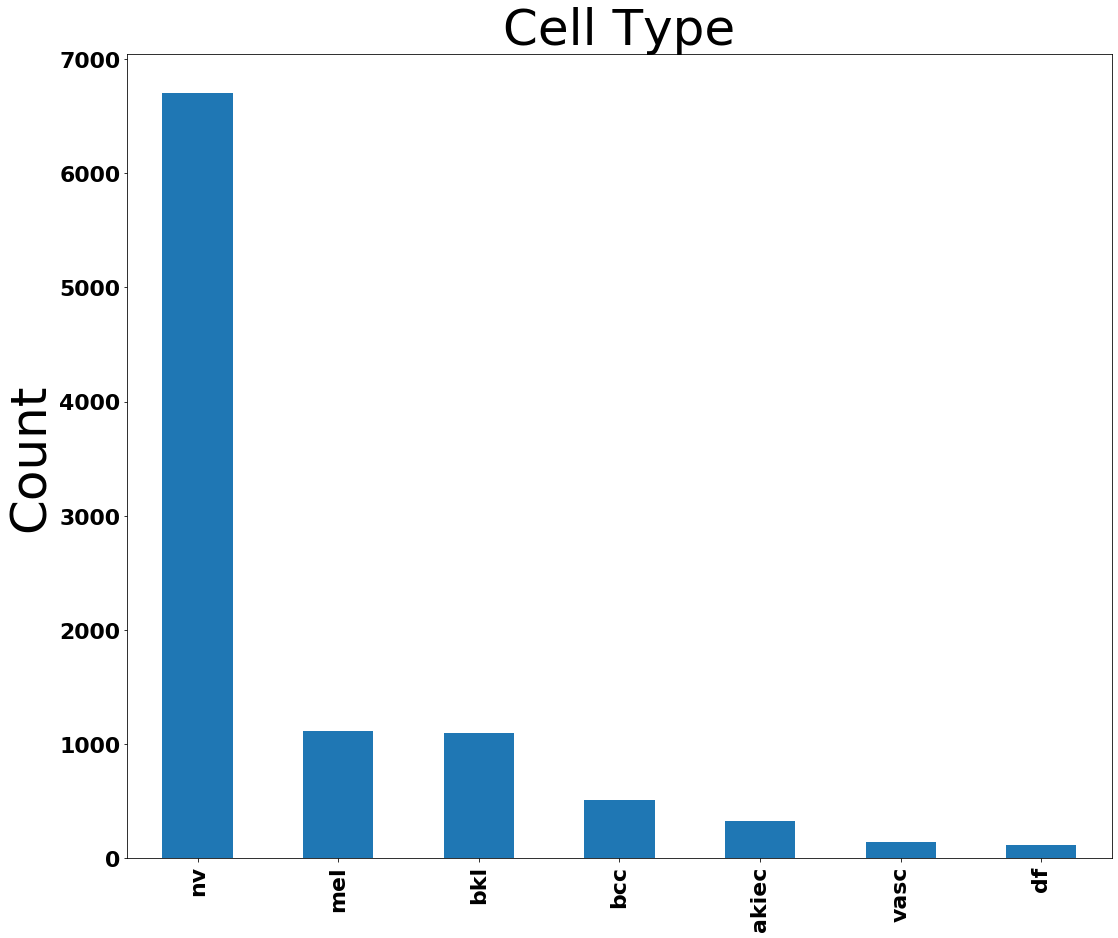

In [6]:
# Getting a sense of what the distribution of each column looks like

font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(30,25))

ax1 = fig.add_subplot(221)
metadata['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count', size=50)
ax1.set_title('Cell Type', size = 50)


plt.tight_layout()
plt.show()

The number of images per class is imbalanced.

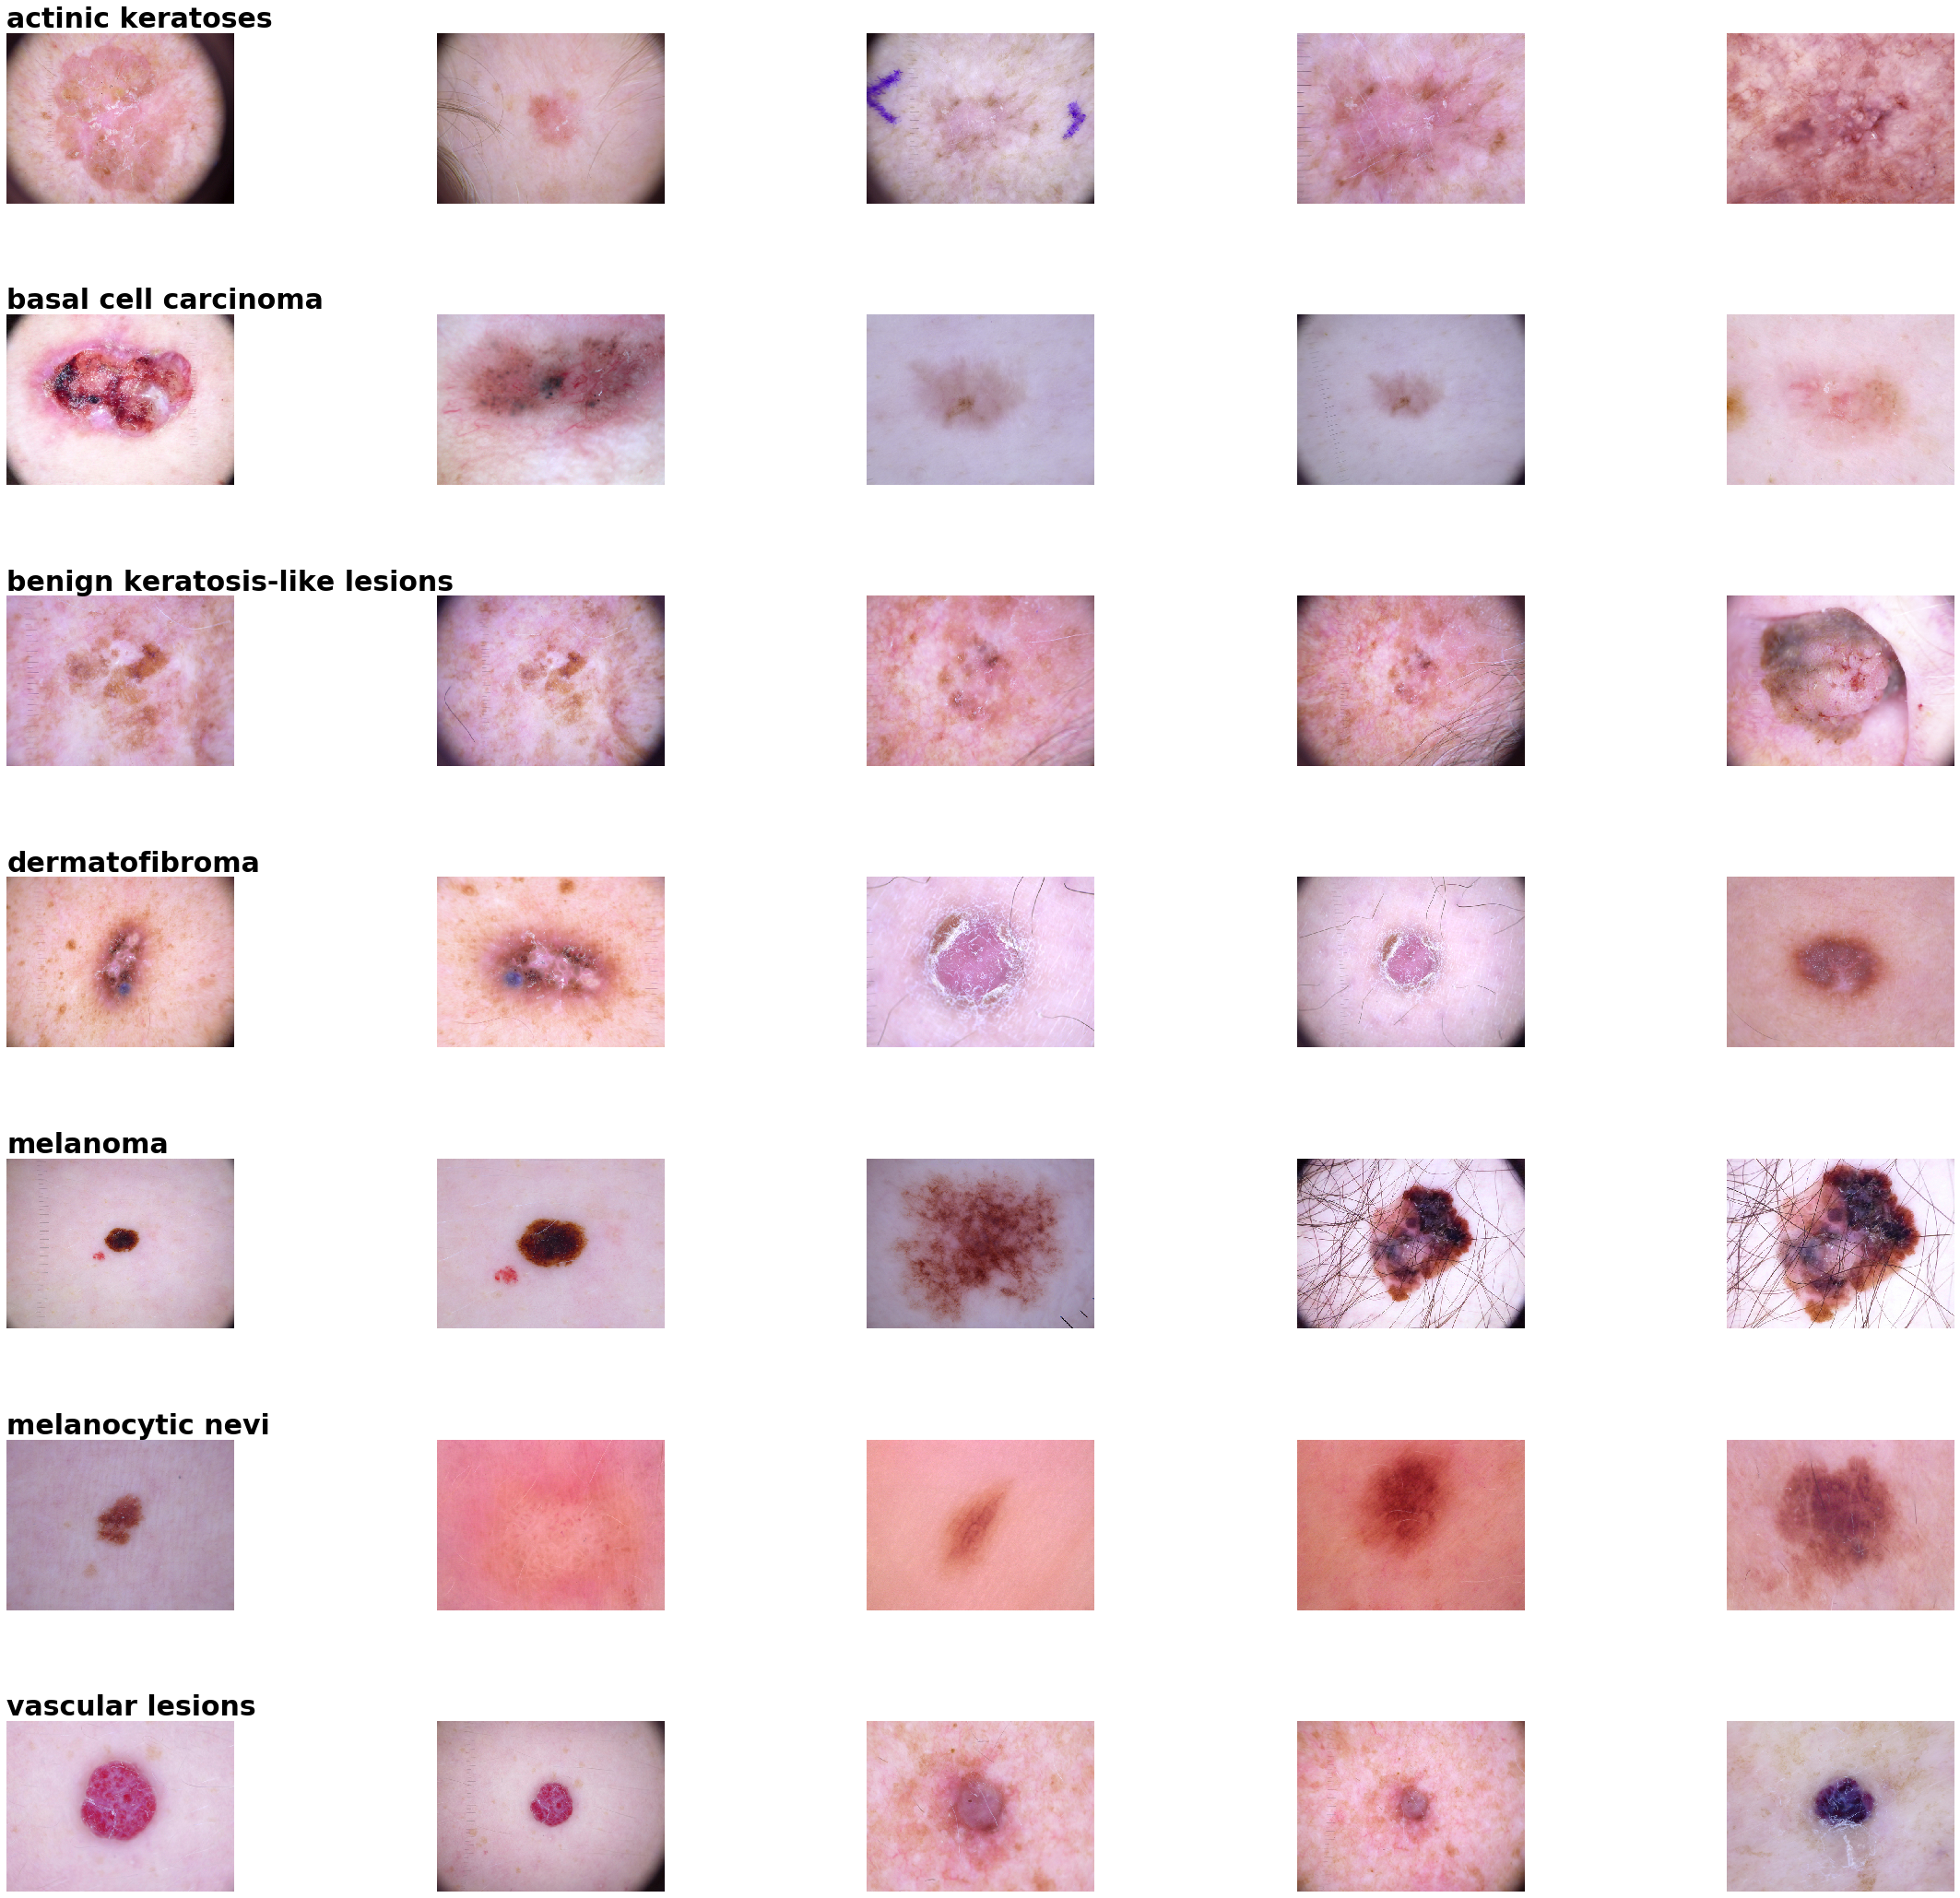

In [7]:
#Visualizing the images

label = [ 'akiec', 'bcc','bkl','df','mel', 'nv',  'vasc']
label_images = []
classes = [ 'actinic keratoses', 'basal cell carcinoma', 'benign keratosis-like lesions', 
           'dermatofibroma','melanoma', 'melanocytic nevi', 'vascular lesions']

fig = plt.figure(figsize=(30, 30))
num_images = 5

for i in label:
    sample = metadata[metadata['dx'] == i]['image_id'][:num_images]
    label_images.extend(sample)
    
for position,ID in enumerate(label_images):
    labl = metadata[metadata['image_id'] == ID]['dx']
    im_sample = data_dir + "/" + labl.values[0] + f'/{ID}.jpg'
    im_sample = imageio.imread(im_sample)

    plt.subplot(7,num_images,position+1)
    plt.imshow(im_sample)
    plt.axis('off')

    if position%5 == 0:
        title = int(position/num_images)
        plt.title(classes[title], loc='left', size=30, weight="bold")

plt.tight_layout()
plt.show()

## Dataloading

Loading the data is an important aspect of training a neural network. An efficient dataloader provides faster iterations over the data and results in faster training.

Use the torchvision.datasets.ImageFolder dataset class. The dataset is already preprocessed into separate folders based on their labels.

You can check here : https://pytorch.org/docs/stable/torchvision/datasets.html

In [0]:
transform data = transforms.Compose([transforms,ToTensor(),])

dataset = torchvision.datasets.ImageFolder(root = data_dir, transform=None, target_transform=None, is_valid_file=None)

Now using the dataset object from above try to count the number of images per class. Look if it matches the histogram data from above.

In [17]:
# count occurence per class
print(dataset[5])

label = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
print(label)
count label = np.zeros(len(label))
for im, lbl in dataset
    count label[lbl]

(<PIL.Image.Image image mode=RGB size=600x450 at 0x7F36ACDDCBA8>, 0)


NameError: ignored

**Epochs vs Iteration vs Batch size**

One **Epoch** is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
Now, we have more than 10000 images in our dataset. It is not possible to feed the entire dataset at once to the computer. 

So, we divide the data into several smaller batches.
**Batch Size** is number of training examples present in a single batch.

**Iterations** are the number of batches needed to complete one epoch.

An Example:

If we have 10000 training images in our dataset. We can divide the dataset into **batches of 500** then it will take **4 iterations** to complete **1 epoch**.


That's where a pytorch dataloader is useful: https://pytorch.org/docs/stable/data.html

In [0]:
# write the data loader

batch_size = 10


Let us see some loaded images

In [0]:
# functions to show an image
fig = plt.figure(figsize=(30, 30))
def imshow(img):
    img = img / 2 + 0.5     # denormalize change this
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(data_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s, ' % classes[labels[j]] for j in range(len(labels))))


## Augmentation

It is a common fact that medical data is scarce. But to learn a very good model, the network needs a lot of data. So to tackle the problem we perform data augmentation.

We also perform data augmentation:
- Flipping the image horizontally
- Rotating image.
- Normalizing the image.

In [0]:
# augmenting the images by roating by 60 degrees
augmentation = transforms.Compose([transforms.RandomRotation(degrees=60)])

# apply this to the Imagefolder dataset class

# Load the data again

# visualize now

# Hausaufgabe

1. Count the appearance of each class using the data_loader object.

2. Play around with augmentation - Flip the image, rotate by 90 degrees, crop the image.